Task4:- Customized Complex Plots

Use the Object-Oriented API of Matplotlib to create complex and highly customized plots

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("100_Sales.csv").drop(columns=['Unnamed: 9','Unnamed: 10'])
data

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50
...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09/03/2011,35.84,97040.64,65214.72
96,Asia,Malaysia,Fruits,Offline,L,28/12/2011,6.92,58471.11,15103.47
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29/06/2016,90.93,228779.10,93748.05
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02


In [42]:
#creating new variables
data['Expense'] = data['Total_Revenue'] - data['Total_Profit']

In [43]:
data['Profit_Margin'] = (data['Total_Profit'] / data['Total_Revenue'] ) * 100

In [45]:
data.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,1582243.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,328376.44,43.067574
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,933903.84,19.386987
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,56065.84,25.830654
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,2657347.52,19.386987


In [46]:
#Let's find which region earns the highest Profit
regions = data.groupby(by='Region')

In [47]:
df_highest_profit_regions = pd.DataFrame(columns=data.columns)

In [48]:
for reg, data in regions:
    highest_profit = data.nlargest(1, 'Total_Profit')
    df_highest_profit_regions = pd.concat([df_highest_profit_regions, highest_profit])

In [49]:
df_highest_profit_regions.sort_values(by='Total_Profit', ascending=False)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,16/08/2013,263.33,4324782.40,1719922.04,2604860.36,39.768984
79,Australia and Oceania,Samoa,Cosmetics,Online,H,08/07/2013,263.33,4220728.80,1678540.98,2542187.82,39.768984
46,Europe,Iceland,Cosmetics,Online,C,31/12/2016,263.33,3876652.40,1541705.29,2334947.11,39.768984
13,Central America and the Caribbean,Honduras,Household,Offline,H,13/02/2017,502.54,5997054.98,1487261.02,4509793.96,24.799856
33,Asia,Myanmar,Household,Offline,H,03/01/2015,502.54,5513227.50,1367272.50,4145955.00,24.799856
59,Sub_Saharan Africa,Djibouti,Cosmetics,Offline,H,19/04/2014,263.33,3154398.00,1254472.05,1899925.95,39.768984
75,North America,Mexico,Household,Offline,C,12/12/2014,502.54,4647149.58,1152486.42,3494663.16,24.799856


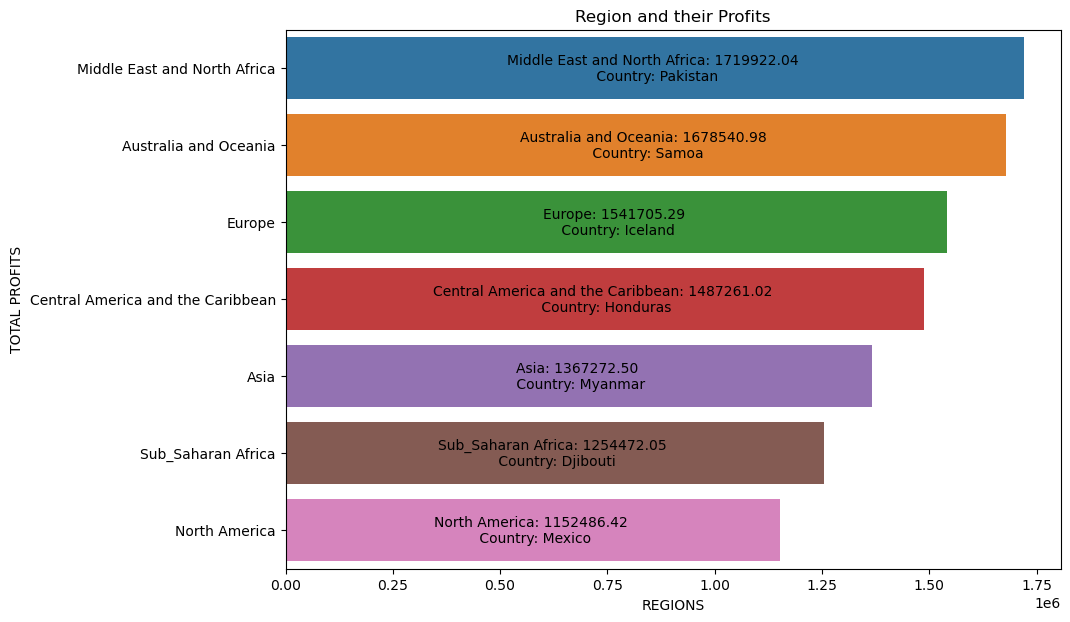

In [50]:
fig, ax = plt.subplots(figsize=(10,7))

tmp_df = df_highest_profit_regions.copy()

tmp_df = tmp_df.sort_values(by='Total_Profit', ascending=False)

sns.barplot(x = tmp_df['Total_Profit'], y=tmp_df['Region'], orient='h', data=tmp_df,\
           order=['Middle East and North Africa', 'Australia and Oceania', 'Europe', 'Central America and the Caribbean', 'Asia', 'Sub_Saharan Africa', 'North America'],
            capsize=0.2, ax=ax)

lbs = ['Middle East and North Africa: 1719922.04 \n Country: Pakistan', 
      'Australia and Oceania: 1678540.98 \n Country: Samoa',
      'Europe: 1541705.29 \n Country: Iceland',
      'Central America and the Caribbean: 1487261.02 \n Country: Honduras',
      'Asia: 1367272.50 \n Country: Myanmar',
      'Sub_Saharan Africa: 1254472.05 \n Country: Djibouti',
      'North America: 1152486.42 \n Country: Mexico']

ax.bar_label(ax.containers[-1], labels=lbs,label_type='center')

plt.title('Region and their Profits')
plt.xlabel('REGIONS')
plt.ylabel('TOTAL PROFITS')
plt.show()

In [52]:
#Let's check Which Region earns the highest Profit Margin
df_highest_pmargin_region = pd.DataFrame(columns=data.columns)

In [53]:
for reg, data in regions:
    highest_margin = data.nlargest(1, 'Profit_Margin')
    df_highest_pmargin_region = pd.concat([df_highest_pmargin_region, highest_margin])

In [54]:
df_highest_pmargin_region.sort_values(by='Profit_Margin', ascending=False)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin
67,Central America and the Caribbean,Belize,Clothes,Offline,M,09/07/2016,35.84,600821.44,403773.12,197048.32,67.203514
12,Asia,Bangladesh,Clothes,Online,L,03/01/2017,35.84,902980.64,606834.72,296145.92,67.203514
56,Australia and Oceania,Fiji,Clothes,Offline,C,08/01/2010,35.84,1082418.40,727423.20,354995.20,67.203514
15,Europe,Bulgaria,Clothes,Online,M,06/03/2012,35.84,182825.44,122865.12,59960.32,67.203514
63,Middle East and North Africa,Libya,Clothes,Offline,H,17/11/2010,35.84,668356.48,449159.04,219197.44,67.203514
11,Sub_Saharan Africa,Cape Verde,Clothes,Offline,H,19/08/2014,35.84,455479.04,306097.92,149381.12,67.203514
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02,326815.89,30.661936


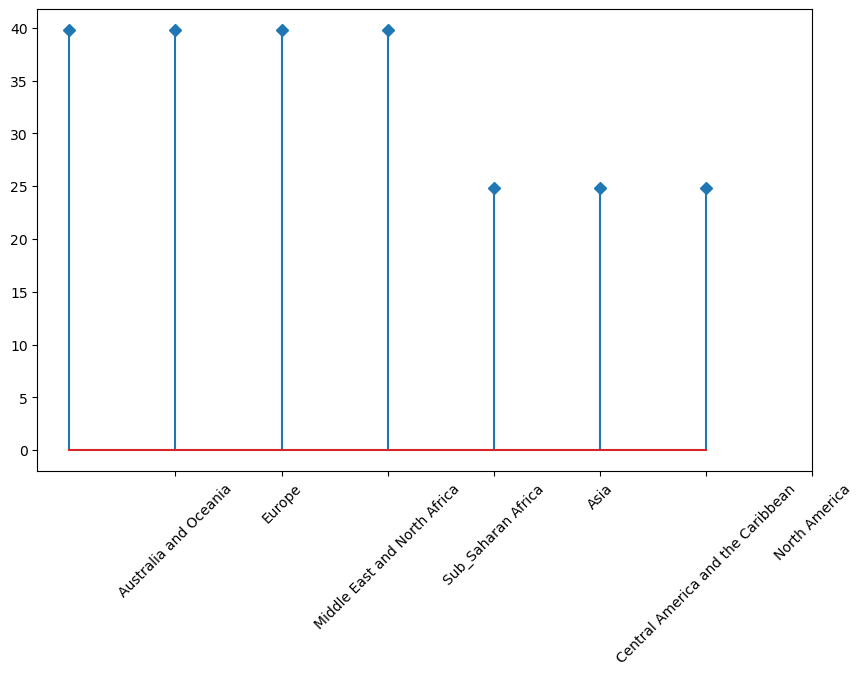

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
tmp_df = df_highest_profit_regions.copy()
tmp_df = tmp_df.sort_values(by='Profit_Margin', ascending=False)
plt.stem(tmp_df['Profit_Margin'],markerfmt='D')
my_range=range(1,len(tmp_df.index)+1)
plt.xticks( my_range, tmp_df['Region'], rotation=45)
plt.show()